In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving imdb reviews.csv to imdb reviews.csv


In [5]:
import io
imdbreviews = pd.read_csv(io.BytesIO(uploaded['imdb reviews.csv']))

In [6]:
imdbreviews.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [7]:
imdbreviews.shape

(50000, 1)

In [1]:
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [9]:
def analyze_sentiment(text):
  analysis=TextBlob(text)
  if analysis.polarity >0 :
    return 'Positive'
  elif analysis.polarity==0:
    return 'Neutral'
  else:
    return 'Negative'

In [10]:
imdbreviews['sentiment']=[str(analyze_sentiment(x))
                          for x in imdbreviews['review']]

In [11]:
imdbreviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,Positive
1,A wonderful little production. <br /><br />The...,Positive
2,I thought this was a wonderful way to spend ti...,Positive
3,Basically there's a family where a little boy ...,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Positive


In [12]:
imdbreviews.sentiment.value_counts()

Positive    37931
Negative    12036
Neutral        33
Name: sentiment, dtype: int64

In [13]:
from wordcloud import WordCloud,STOPWORDS

In [14]:
review_words=''
stopwords=set(STOPWORDS)
for val in imdbreviews.review:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  review_words +=" ".join(tokens)+" "

In [15]:
wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,
                    min_font_size=10).generate(review_words)

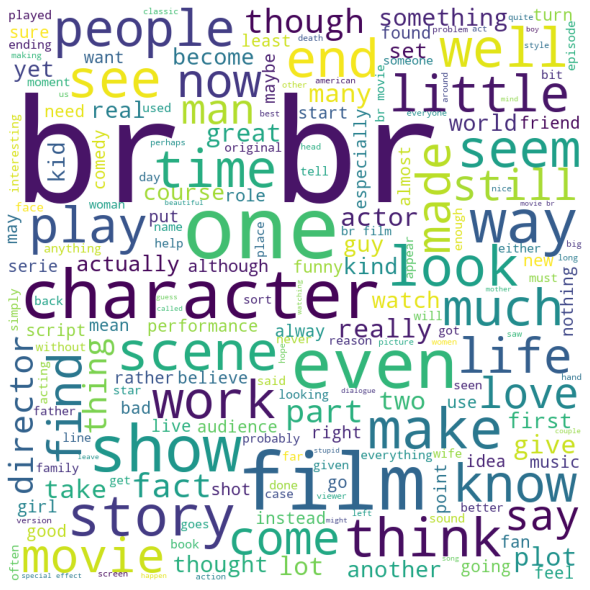

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf=TfidfVectorizer(analyzer='word',ngram_range=(1,3),min_df=0,
                      stop_words='english',max_features=400)

In [19]:
tfidfmatrix=tfidf.fit_transform(imdbreviews.review)

In [20]:
tfidfmatrix.shape

(50000, 400)

In [21]:
df=pd.DataFrame(tfidfmatrix.toarray(),columns=tfidf.get_feature_names())

In [22]:
tfidfdf=pd.concat([df,imdbreviews.sentiment],axis=1)

In [23]:
tfidfdf.to_csv('tfidf.csv')

In [24]:
y=tfidfdf.sentiment
X=tfidfdf.drop('sentiment',axis=1)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
y=le.fit_transform(y)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic=LogisticRegression(multi_class='multinomial',max_iter=200)

In [30]:
logisticmodel=logistic.fit(X,y)

In [31]:
logisticmodel.score(X,y)

0.87322